In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("D3 (1).csv")

In [7]:
x1 = df.values[:, 0]
x2 = df.values[:, 1]
x3 = df.values[:, 2]
y  = df.values[:, 3]

In [16]:
#using Mean squared error (MSE) for loss fucntion
def mean_SE(y, y_bar):
    diff = y - y_bar     #diff between observed and predicted values
    squared_diff = diff ** 2
    summation = squared_diff.sum()
    MSE = summation / len(y)     #dividing summation to find average
    return MSE

In [11]:
def gradient_descent(x, y, lr, i_iter):
    theta0 = 0
    theta1 = 0
    losses = []
    thetas = []
    for i in range (i_iter):
        y_bar = theta1 * x + theta0
        loss = mean_SE(y, y_bar)
        theta0 = theta0 - (lr * -2 * (y - y_bar).sum()/len(y))
        theta1 = theta1 - (lr * -2 * (x.dot (y - y_bar)).sum()/len(y))
        losses.append(loss)
        thetas.append((theta0, theta1))
    return thetas, losses

In [12]:
#using 0.1 for learning rate, 100 as num of iterations
thetas1, losses1 = gradient_descent(x1, y, 0.1, 100)
thetas2, losses2 = gradient_descent(x2, y, 0.1, 100)
thetas3, losses3 = gradient_descent(x3, y, 0.1, 100)

In [13]:
print("y_bar=", thetas1[99][1], "x1 +", thetas1[99][0])
print("y_bar=", thetas2[99][1], "x2 +", thetas2[99][0])
print("y_bar=", thetas3[99][1], "x3 +", thetas3[99][0])

y_bar= -2.0139183363434374 x1 + 5.865210016631735
y_bar= 0.5594936043079572 x2 + 0.7312147237836082
y_bar= -0.5099131311709395 x3 + 2.844696680526461


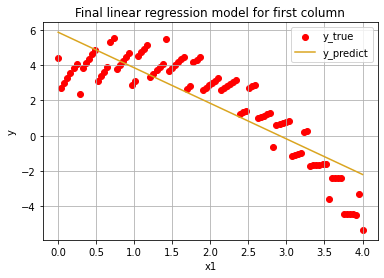

In [15]:
plt.scatter(x1, y, color='red')
plt.grid()
plt.xlabel('x1')
plt.ylabel('y')
y_predict = thetas1[99][1] * x1 + thetas1[99][0]
plt.plot(x1, y_predict, color='goldenrod')
plt.title('Final linear regression model for first column')
plt.legend(["y_true", "y_predict"])

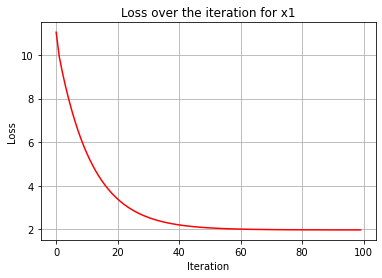

In [17]:
#loss for x1
x_axis = np.arange(0., 100, 1)
plt.grid()
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over the iteration for x1')
plt.plot(x_axis, losses1, color = 'red')

In [18]:
#finding lowest loss between the 3 variables
print("final loss for x1:", losses1[99])
print("final loss for x2:", losses2[99])
print("final loss for x3:", losses3[99])

final loss for x1: 1.9710858127615194
final loss for x2: 7.198738595930004
final loss for x3: 7.2591058512847875


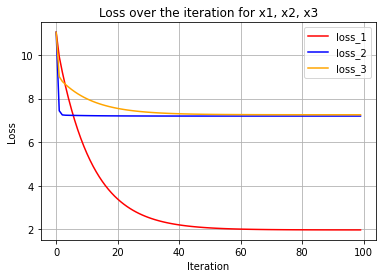

In [21]:
#x1 clearly has the lowest loss, see again the graphical form below
x_axis = np.arange(0., 100, 1)
plt.grid()
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over the iteration for x1, x2, x3')
plt.plot(x_axis, losses1, color = 'red')
plt.plot(x_axis, losses2, color = 'blue')
plt.plot(x_axis, losses3, color = 'orange')
plt.legend(["loss_1", "loss_2", "loss_3"])

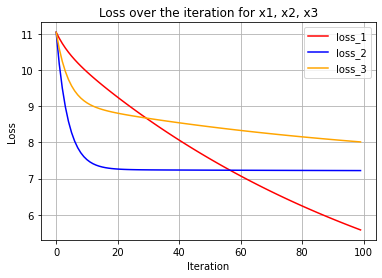

In [22]:
#changing learning rate to 0.01
thetas1, losses1 = gradient_descent(x1, y, 0.01, 100)
thetas2, losses2 = gradient_descent(x2, y, 0.01, 100)
thetas3, losses3 = gradient_descent(x3, y, 0.01, 100)

x_axis = np.arange(0., 100, 1)
plt.grid()
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over the iteration for x1, x2, x3')
plt.plot(x_axis, losses1, color = 'red')
plt.plot(x_axis, losses2, color = 'blue')
plt.plot(x_axis, losses3, color = 'orange')
plt.legend(["loss_1", "loss_2", "loss_3"])

In [26]:
#new gradient descent for 3 variables
def gradient_descent_3var(x1, x2, x3, y, lr, i_iter): 
    theta0 = 0 #initializing parameters to 0 
    theta1 = 0 #initializing parameters to 0, this is for x1 column
    theta2 = 0 #initializing parameters to 0, this is for x2 column
    theta3 = 0 #initializing parameters to 0, this is for x3 column
    losses = [] 
    thetas = [] 
    for i in range (i_iter): 
        y_bar = theta3*x3 + theta2*x2 + theta1*x1 + theta0 
        loss = mean_SE(y, y_bar) 
        theta0 = theta0 - (lr*-2*(y-y_bar).sum()/len(y)) 
        theta1 = theta1 - (lr*-2*(x1.dot(y-y_bar)).sum()/len(y)) 
        theta2 = theta2 - (lr*-2*(x2.dot(y-y_bar)).sum()/len(y)) 
        theta3 = theta3 - (lr*-2*(x3.dot(y-y_bar)).sum()/len(y)) 
        losses.append(loss) 
        thetas.append((theta0, theta1, theta2, theta3)) 
    return thetas, losses

thetas, losses = gradient_descent_3var(x1, x2, x3, y, 0.01, 200)

In [27]:
print("y_bar = ", thetas[199][3], "* (x3) + ", thetas[199][2], "* (x2) + ", thetas[199][1], "* (x1) + ", thetas[199][0])

y_bar =  0.2392281147826231 * (x3) +  1.1043591229312444 * (x2) +  -1.5024404578385284 * (x1) +  1.8311900997333497


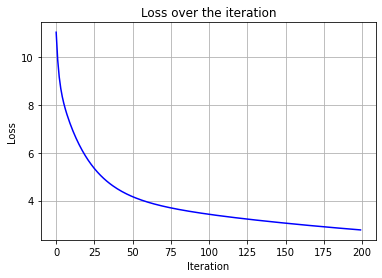

In [28]:
#loss plot
x_axis = np.arange(0., 200, 1)
plt.grid()
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over the iteration')
plt.plot(x_axis, losses, color = 'blue')

In [35]:
#predicting our dependant variable for different given explanatory variables 
x1, x2, x3, = 1, 1, 1
y1_bar = 0.2392281147826231 * (x3) +  1.1043591229312444 * (x2) +  -1.5024404578385284 * (x1) +  1.8311900997333497

x1, x2, x3, = 2, 0, 4
y2_bar = 0.2392281147826231 * (x3) +  1.1043591229312444 * (x2) +  -1.5024404578385284 * (x1) +  1.8311900997333497

x1, x2, x3, = 3, 2, 1
y3_bar = 0.2392281147826231 * (x3) +  1.1043591229312444 * (x2) +  -1.5024404578385284 * (x1) +  1.8311900997333497

y1_bar, y2_bar, y3_bar

(1.6723368796086888, -0.2167783568132149, -0.22818491313712408)